In [2]:
import pandas as pd
import warnings
import rpy2
warnings.filterwarnings('ignore')

In [3]:
%load_ext rpy2.ipython

In [4]:
import plotly.graph_objects as go

def plot_(title, *series):
    # Crear una figura
    fig = go.Figure()

    # Agregar cada serie de datos al gráfico
    for x_variable, y_variable, label in series:
        fig.add_trace(go.Scatter(
            x=x_variable,
            y=y_variable,
            mode='lines',
            name=label,
            line=dict(width=2)
        ))

    # Actualizar el tipo de eje x a 'date'
    fig.update_xaxes(type='date')

    # Ajustar el título para que esté centrado
    fig.update_layout(title_text=title, title_x=0.5)

    # Personalizar el selector de rango de fechas
    fig.update_layout(
        xaxis=dict(
            rangeselector=dict(
                buttons=list([
                    dict(count=1,
                         label="1d",
                         step="day",
                         stepmode="backward"),
                    dict(count=7,
                         label="1w",
                         step="day",
                         stepmode="backward"),
                    dict(count=1,
                         label="1m",
                         step="month",
                         stepmode="backward"),
                    dict(count=3,
                         label="3m",
                         step="month",
                         stepmode="backward"),
                    dict(count=6,
                         label="6m",
                         step="month",
                         stepmode="backward"),
                    dict(count=1,
                         label="1y",
                         step="year",
                         stepmode="backward"),
                    dict(count=2,
                         label="2y",
                         step="year",
                         stepmode="backward"),
                    dict(step="all")
                ])
            ),
            rangeslider=dict(
                visible=True
            ),
            type="date"
        ),
        yaxis=dict(
            autorange=True,
            type="linear"
        )
    )

    # Personalizar los títulos de los ejes
    fig.update_layout(
        xaxis_title="Tiempo",
        yaxis_title="Precio en dolares"
    )

    # Personalizar la leyenda
    fig.update_layout(
        legend=dict(
            orientation="v",
            yanchor="top",
            y=1,
            xanchor="left",
            x=-.35
        )
    )

    # Mostrar el gráfico
    fig.show()

# 0 Importación de datos


La elección de la base de datos que abarca el periodo 2000-01-01 a 2010-01-01 para analizar las acciones de Bancolombia se justifica por la exclusión del impacto de la pandemia mundial, permitiendo un enfoque claro en factores y tendencias previas a este suceso y la limitante de computo. La extensión temporal facilita la evaluación del comportamiento de las acciones, buscando determinar si siguen una caminata aleatoria, lo que es esencial para evaluar la eficacia de estrategias de inversión basadas en análisis histórico. Además, la serie temporal presenta irregularidades en la espaciación de los datos, lo que agrega complejidad al análisis y requiere adaptación en las técnicas utilizadas para tener en cuenta la variabilidad en la frecuencia de observaciones.

In [5]:
import yfinance as yf

ticker_name = 'BC'

data = yf.download(ticker_name, start='2003-06-01', end='2013-06-01')
print(data.shape)
data.head()

[*********************100%%**********************]  1 of 1 completed

(2518, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-06-02,22.080000,22.490000,22.049999,22.200001,16.651114,519800
2003-06-03,22.200001,22.480000,22.200001,22.400000,16.801126,327000
2003-06-04,22.370001,23.139999,22.370001,23.000000,17.251152,444100
2003-06-05,22.900000,23.240000,22.799999,23.150000,17.363665,394200
2003-06-06,25.010000,25.080000,24.100000,24.150000,18.113716,905600


In [6]:
df = pd.DataFrame()
df["Date"] = pd.to_datetime(data.index)
df["Close"] = data["Close"].values
display(df.head(10))
display(df.shape)

df_completo = df.copy()
df_completo.set_index('Date', inplace=True)
df_completo = df_completo.resample('1D').mean().ffill()
display(df_completo.head(10))
df_completo.shape

,Date,Close
0,2003-06-02,22.200001
1,2003-06-03,22.400000
2,2003-06-04,23.000000
3,2003-06-05,23.150000
4,2003-06-06,24.150000
5,2003-06-09,24.540001
6,2003-06-10,24.660000
7,2003-06-11,25.120001
8,2003-06-12,25.090000
9,2003-06-13,25.170000


(2518, 2)

,Close
Date,
2003-06-02,22.200001
2003-06-03,22.400000
2003-06-04,23.000000
2003-06-05,23.150000
2003-06-06,24.150000
2003-06-07,24.150000
2003-06-08,24.150000
2003-06-09,24.540001
2003-06-10,24.660000


(3652, 1)

In [7]:

train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

n = len(df_completo)
train_size = int(n * train_ratio)
val_size = int(n * val_ratio)

train_data = df_completo.iloc[:train_size]
val_data = df_completo.iloc[train_size:train_size+val_size]
test_data = df_completo.iloc[train_size+val_size:]

plot_("Train and Test Data",
      (train_data.index, train_data['Close'], "Train Data"),
      (test_data.index, test_data['Close'], "Test Data"),
      (val_data.index, val_data['Close'], "Validation Data"))

Preparando los datos...
Iniciando optimización de parámetros...
Optimización completada en 50.75 segundos.
Mejores parámetros encontrados:


,Parametro,Valor
0,p,2
1,d,0
2,q,0


Iniciando predicción rolling...


Rolling ARIMA model:   0%|          | 0/549 [00:00<?, ?it/s]

Procesando dato 1 de 549


Rolling ARIMA model:   2%|▏         | 10/549 [00:04<04:00,  2.24it/s]

Procesando dato 11 de 549


Rolling ARIMA model:   4%|▎         | 20/549 [00:09<04:04,  2.16it/s]

Procesando dato 21 de 549


Rolling ARIMA model:   5%|▌         | 30/549 [00:16<04:16,  2.02it/s]

Procesando dato 31 de 549


Rolling ARIMA model:   7%|▋         | 40/549 [00:20<03:46,  2.25it/s]

Procesando dato 41 de 549


Rolling ARIMA model:   9%|▉         | 50/549 [00:24<03:40,  2.27it/s]

Procesando dato 51 de 549


Rolling ARIMA model:  11%|█         | 60/549 [00:29<03:31,  2.31it/s]

Procesando dato 61 de 549


Rolling ARIMA model:  13%|█▎        | 70/549 [00:33<03:28,  2.29it/s]

Procesando dato 71 de 549


Rolling ARIMA model:  15%|█▍        | 80/549 [00:38<03:25,  2.28it/s]

Procesando dato 81 de 549


Rolling ARIMA model:  16%|█▋        | 90/549 [00:42<03:21,  2.27it/s]

Procesando dato 91 de 549


Rolling ARIMA model:  18%|█▊        | 100/549 [00:46<03:08,  2.38it/s]

Procesando dato 101 de 549


Rolling ARIMA model:  20%|██        | 110/549 [00:51<03:05,  2.36it/s]

Procesando dato 111 de 549


Rolling ARIMA model:  22%|██▏       | 120/549 [00:55<03:01,  2.37it/s]

Procesando dato 121 de 549


Rolling ARIMA model:  24%|██▎       | 130/549 [00:59<02:56,  2.37it/s]

Procesando dato 131 de 549


Rolling ARIMA model:  26%|██▌       | 140/549 [01:03<02:53,  2.36it/s]

Procesando dato 141 de 549


Rolling ARIMA model:  27%|██▋       | 150/549 [01:08<02:51,  2.32it/s]

Procesando dato 151 de 549


Rolling ARIMA model:  29%|██▉       | 160/549 [01:12<02:56,  2.20it/s]

Procesando dato 161 de 549


Rolling ARIMA model:  31%|███       | 170/549 [01:17<02:57,  2.14it/s]

Procesando dato 171 de 549


Rolling ARIMA model:  33%|███▎      | 180/549 [01:21<02:44,  2.24it/s]

Procesando dato 181 de 549


Rolling ARIMA model:  35%|███▍      | 190/549 [01:26<02:39,  2.25it/s]

Procesando dato 191 de 549


Rolling ARIMA model:  36%|███▋      | 200/549 [01:32<05:23,  1.08it/s]

Procesando dato 201 de 549


Rolling ARIMA model:  38%|███▊      | 210/549 [01:39<04:11,  1.35it/s]

Procesando dato 211 de 549


Rolling ARIMA model:  40%|████      | 220/549 [01:46<02:56,  1.87it/s]

Procesando dato 221 de 549


Rolling ARIMA model:  42%|████▏     | 230/549 [01:53<03:29,  1.52it/s]

Procesando dato 231 de 549


Rolling ARIMA model:  44%|████▎     | 240/549 [02:00<04:22,  1.18it/s]

Procesando dato 241 de 549


Rolling ARIMA model:  46%|████▌     | 250/549 [02:12<06:04,  1.22s/it]

Procesando dato 251 de 549


Rolling ARIMA model:  47%|████▋     | 260/549 [02:16<02:16,  2.12it/s]

Procesando dato 261 de 549


Rolling ARIMA model:  49%|████▉     | 270/549 [02:21<02:08,  2.18it/s]

Procesando dato 271 de 549


Rolling ARIMA model:  51%|█████     | 280/549 [02:25<02:01,  2.21it/s]

Procesando dato 281 de 549


Rolling ARIMA model:  53%|█████▎    | 290/549 [02:30<01:55,  2.24it/s]

Procesando dato 291 de 549


Rolling ARIMA model:  55%|█████▍    | 300/549 [02:34<01:57,  2.12it/s]

Procesando dato 301 de 549


Rolling ARIMA model:  56%|█████▋    | 310/549 [02:39<01:57,  2.04it/s]

Procesando dato 311 de 549


Rolling ARIMA model:  58%|█████▊    | 320/549 [02:45<02:05,  1.82it/s]

Procesando dato 321 de 549


Rolling ARIMA model:  60%|██████    | 330/549 [02:51<01:39,  2.21it/s]

Procesando dato 331 de 549


Rolling ARIMA model:  62%|██████▏   | 340/549 [02:56<01:40,  2.09it/s]

Procesando dato 341 de 549


Rolling ARIMA model:  64%|██████▍   | 350/549 [03:01<01:30,  2.20it/s]

Procesando dato 351 de 549


Rolling ARIMA model:  66%|██████▌   | 360/549 [03:05<01:25,  2.20it/s]

Procesando dato 361 de 549


Rolling ARIMA model:  67%|██████▋   | 370/549 [03:10<01:27,  2.05it/s]

Procesando dato 371 de 549


Rolling ARIMA model:  69%|██████▉   | 380/549 [03:15<01:17,  2.18it/s]

Procesando dato 381 de 549


Rolling ARIMA model:  71%|███████   | 390/549 [03:19<01:15,  2.10it/s]

Procesando dato 391 de 549


Rolling ARIMA model:  73%|███████▎  | 400/549 [03:25<01:25,  1.75it/s]

Procesando dato 401 de 549


Rolling ARIMA model:  75%|███████▍  | 410/549 [03:29<01:04,  2.15it/s]

Procesando dato 411 de 549


Rolling ARIMA model:  77%|███████▋  | 420/549 [03:34<01:01,  2.09it/s]

Procesando dato 421 de 549


Rolling ARIMA model:  78%|███████▊  | 430/549 [03:39<00:55,  2.16it/s]

Procesando dato 431 de 549


Rolling ARIMA model:  80%|████████  | 440/549 [03:43<00:50,  2.15it/s]

Procesando dato 441 de 549


Rolling ARIMA model:  82%|████████▏ | 450/549 [03:48<00:45,  2.15it/s]

Procesando dato 451 de 549


Rolling ARIMA model:  84%|████████▍ | 460/549 [03:53<00:42,  2.07it/s]

Procesando dato 461 de 549


Rolling ARIMA model:  86%|████████▌ | 470/549 [03:58<00:41,  1.89it/s]

Procesando dato 471 de 549


Rolling ARIMA model:  87%|████████▋ | 480/549 [04:03<00:34,  2.01it/s]

Procesando dato 481 de 549


Rolling ARIMA model:  89%|████████▉ | 490/549 [04:08<00:30,  1.94it/s]

Procesando dato 491 de 549


Rolling ARIMA model:  91%|█████████ | 500/549 [04:15<00:31,  1.57it/s]

Procesando dato 501 de 549


Rolling ARIMA model:  93%|█████████▎| 510/549 [04:20<00:21,  1.78it/s]

Procesando dato 511 de 549


Rolling ARIMA model:  95%|█████████▍| 520/549 [04:25<00:14,  2.00it/s]

Procesando dato 521 de 549


Rolling ARIMA model:  97%|█████████▋| 530/549 [04:33<00:19,  1.01s/it]

Procesando dato 531 de 549


Rolling ARIMA model:  98%|█████████▊| 540/549 [04:51<00:16,  1.84s/it]

Procesando dato 541 de 549


Rolling ARIMA model: 100%|██████████| 549/549 [05:03<00:00,  1.81it/s]


Predicción rolling completada.
Generando gráficos...


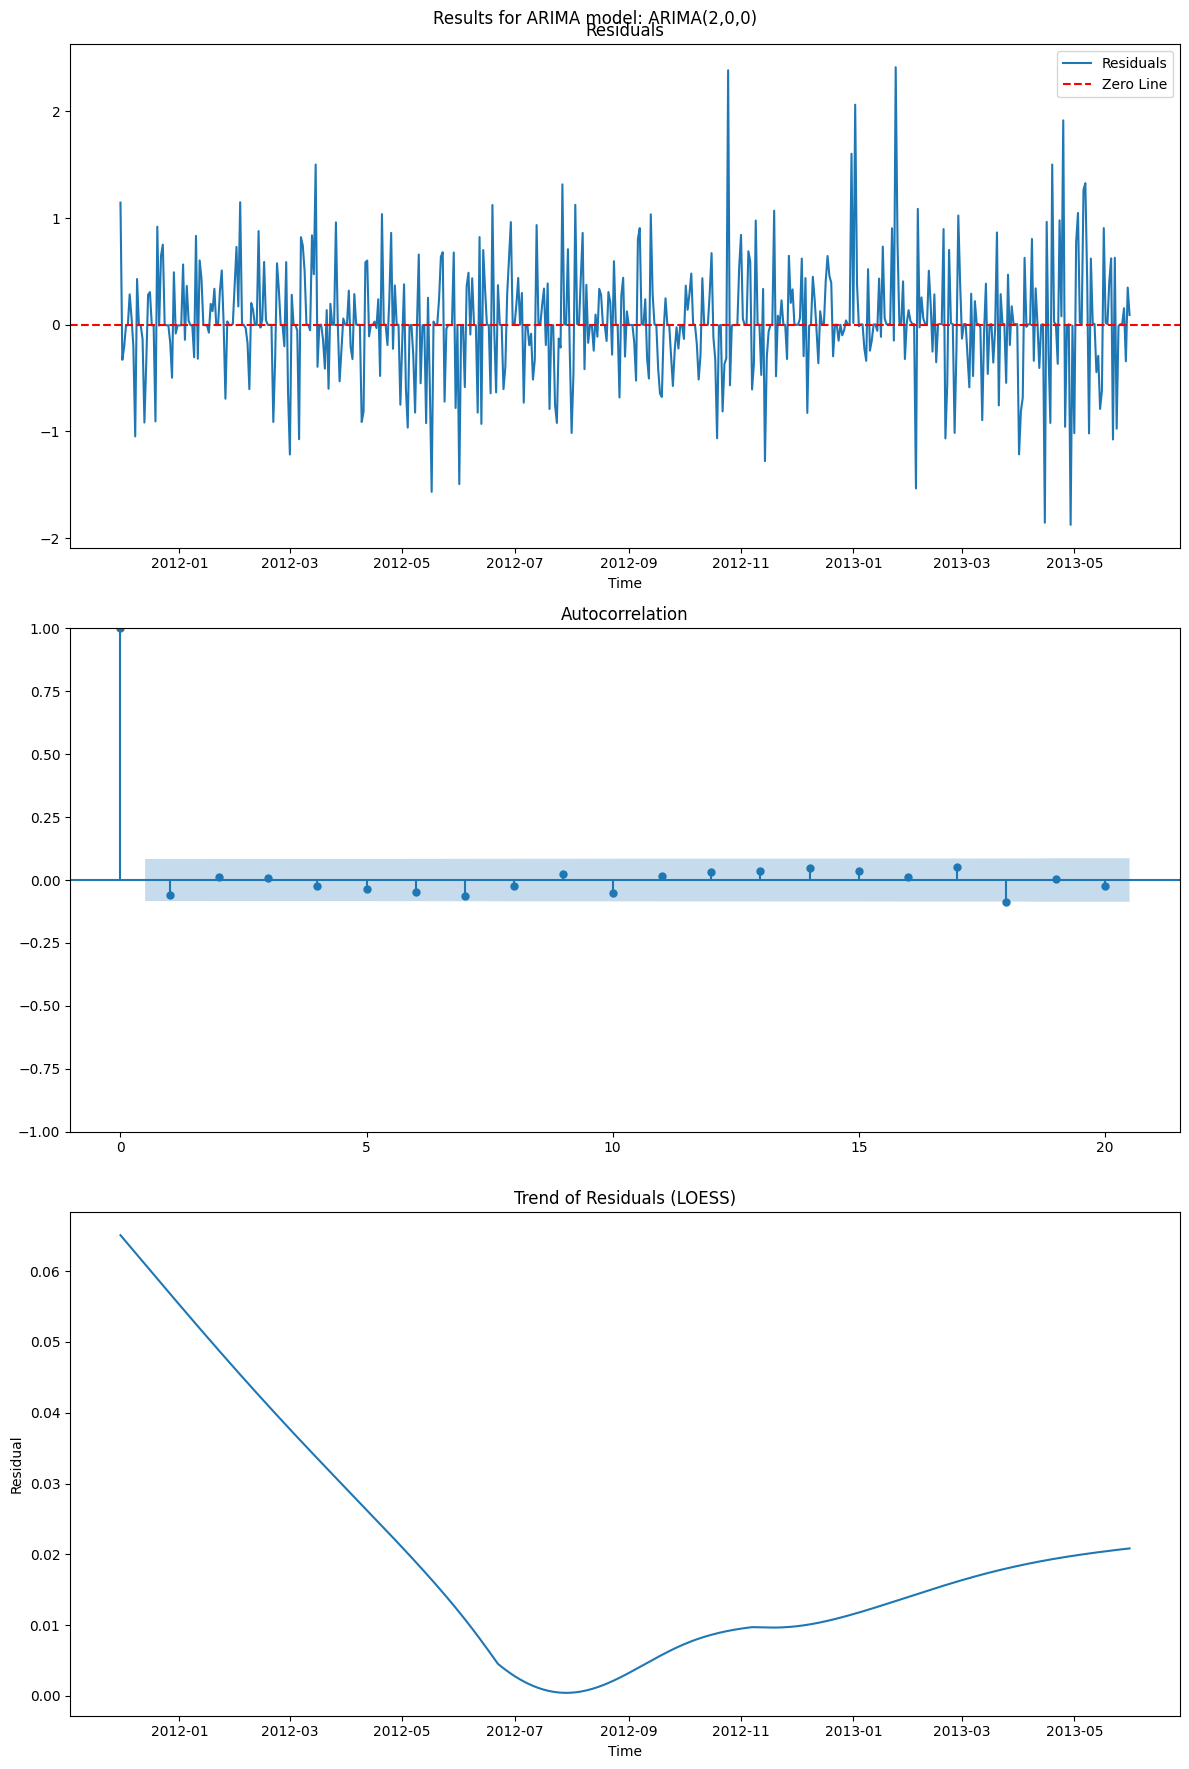

Resultados finales:


,Model,MSE
0,"ARIMA(2,0,0)",0.273618


Proceso completado.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
from tqdm import tqdm
import statsmodels.api as sm
from scipy.stats import pearsonr
from skopt import gp_minimize
from skopt.space import Integer
import time

warnings.filterwarnings('ignore')

# Supongamos que `df_completo` ya está cargado y tiene las columnas 'Date' y 'Close'
# Segmentación de los datos
print("Preparando los datos...")
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15
n = len(df_completo)
train_size = int(n * train_ratio)
val_size = int(n * val_ratio)

train_data = df_completo.iloc[:train_size]
val_data = df_completo.iloc[train_size:train_size + val_size]
test_data = df_completo.iloc[train_size + val_size:]

# Función para entrenar y predecir usando ARIMA
def train_and_predict(df, p, d, q):
    model = ARIMA(df['Close'], order=(p, d, q))
    fitted_model = model.fit()
    return fitted_model.forecast(steps=1), fitted_model

def plot_residuals_and_stats(date, test_residual, title, fig, axs):
    plt.suptitle(f'Results for ARIMA model: {title}')
    
    # Residuals
    axs[0].plot(date, test_residual)
    axs[0].set_title('Residuals')
    axs[0].set_xlabel('Time')
    axs[0].axhline(0, color='red', linestyle='--')
    axs[0].legend(['Residuals', 'Zero Line'])
    
    # Autocorrelation
    sm.graphics.tsa.plot_acf(test_residual, lags=20, ax=axs[1])
    axs[1].set_title('Autocorrelation')
    
    # Trend of Residuals (LOESS)
    lowess = sm.nonparametric.lowess(test_residual, np.arange(len(test_residual)), frac=0.75)
    axs[2].plot(date, lowess[:, 1])
    axs[2].set_title('Trend of Residuals (LOESS)')
    axs[2].set_xlabel('Time')
    axs[2].set_ylabel('Residual')
    
    plt.tight_layout()

# Optimización de parámetros en el conjunto de validación
print("Iniciando optimización de parámetros...")
start_time = time.time()

def objective(params):
    p, d, q = params
    pred, fitted_model = train_and_predict(train_data, p, d, q)
    val_predictions = fitted_model.forecast(steps=len(val_data))
    mse = mean_squared_error(val_data['Close'], val_predictions)
    return mse

space = [Integer(0, 3), Integer(0, 2), Integer(0, 3)]  # Reduced search space
res = gp_minimize(objective, space, n_calls=20, random_state=42, n_jobs=-1)  # Reduced n_calls and added parallel processing

best_p, best_d, best_q = res.x

optimization_time = time.time() - start_time
print(f"Optimización completada en {optimization_time:.2f} segundos.")

best_params = pd.DataFrame({
    "Parametro": ["p", "d", "q"],
    "Valor": [best_p, best_d, best_q]
})

print("Mejores parámetros encontrados:")
display(best_params)

# Rolling prediction en los datos de prueba usando los mejores parámetros
print("Iniciando predicción rolling...")
test_residuals = []

for i in tqdm(range(len(test_data)), desc="Rolling ARIMA model"):
    expanded_train_data = pd.concat([train_data, test_data.iloc[:i]])
    pred, fitted_model = train_and_predict(expanded_train_data, best_p, best_d, best_q)
    test_residuals.append(test_data['Close'].iloc[i] - pred.iloc[0])

print("Predicción rolling completada.")

# Plotting
print("Generando gráficos...")
fig, axs = plt.subplots(3, 1, figsize=(12, 18))
plot_residuals_and_stats(test_data.index, test_residuals, f"ARIMA({best_p},{best_d},{best_q})", fig, axs)
plt.show()

# Calcula y muestra el MSE
mse = mean_squared_error(test_data['Close'], test_data['Close'] - np.array(test_residuals))
mse_results_ARIMA = pd.DataFrame({
    "Model": [f"ARIMA({best_p},{best_d},{best_q})"],
    "MSE": [mse]
})

print("Resultados finales:")
display(mse_results_ARIMA)

# Plot de predicción vs datos reales
plot_("ARIMA Model vs Real Data",
      (test_data.index, test_data['Close'], "Real Data"),
      (test_data.index, test_data['Close'] - np.array(test_residuals), "ARIMA Model"))

print("Proceso completado.")

In [10]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
from tqdm import tqdm
from skopt import gp_minimize
from skopt.space import Integer, Categorical
from skopt.utils import use_named_args
import time

warnings.filterwarnings('ignore')

# Asumimos que df_completo ya está cargado y tiene las columnas 'Date' y 'Close'
print("Preparando los datos...")
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15
n = len(df_completo)
train_size = int(n * train_ratio)
val_size = int(n * val_ratio)

train_data = df_completo.iloc[:train_size]
val_data = df_completo.iloc[train_size:train_size + val_size]
test_data = df_completo.iloc[train_size + val_size:]

def train_and_predict(df, p, d, q):
    model = ARIMA(df['Close'], order=(p, d, q))
    fitted_model = model.fit()
    return fitted_model.forecast(steps=1), fitted_model

print("Iniciando optimización de hiperparámetros...")
start_time = time.time()

# Definimos el espacio de búsqueda
space = [
    Integer(0, 5, name='p'),
    Integer(0, 2, name='d'),
    Integer(0, 5, name='q')
]

# Función objetivo mejorada
@use_named_args(space)
def objective(p, d, q):
    try:
        pred, fitted_model = train_and_predict(train_data, p, d, q)
        val_predictions = fitted_model.forecast(steps=len(val_data))
        mse = mean_squared_error(val_data['Close'], val_predictions)
        return mse
    except:
        return np.inf

# Optimización con Bayesian optimization
res = gp_minimize(
    objective,
    space,
    n_calls=50,  # Aumentamos el número de llamadas para una búsqueda más exhaustiva
    random_state=42,
    n_jobs=-1,  # Usa todos los núcleos disponibles
    verbose=True
)

best_p, best_d, best_q = res.x

optimization_time = time.time() - start_time
print(f"Optimización completada en {optimization_time:.2f} segundos.")

best_params = pd.DataFrame({
    "Parámetro": ["p", "d", "q"],
    "Valor": [best_p, best_d, best_q]
})

print("Mejores parámetros encontrados:")
print(best_params)

# El resto del código (predicción rolling, gráficos, etc.) permanece igual

Preparando los datos...
Iniciando optimización de hiperparámetros...
Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 10.1918
Function value obtained: 11.7473
Current minimum: 11.7473
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.2581
Function value obtained: 12.5663
Current minimum: 11.7473
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 1.3519
Function value obtained: 12.5664
Current minimum: 11.7473
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 5.3754
Function value obtained: 12.3239
Current minimum: 11.7473
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 13.6286
Function val